In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/deep_learning')

In [3]:
feature_name = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing'
              , 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring'
              , 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type'
              , 'spore-print-color', 'population', 'habitat']

In [4]:
import pandas as pd
df = pd.read_csv('agaricus-lepiota.data', sep=",", header=None, names=feature_name)

In [5]:
df.head(7)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
for col in df:
    print("{} = {}".format(col, df[col].unique()))

class = ['p' 'e']
cap-shape = ['x' 'b' 's' 'f' 'k' 'c']
cap-surface = ['s' 'y' 'f' 'g']
cap-color = ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises = ['t' 'f']
odor = ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment = ['f' 'a']
gill-spacing = ['c' 'w']
gill-size = ['n' 'b']
gill-color = ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape = ['e' 't']
stalk-root = ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring = ['s' 'f' 'k' 'y']
stalk-surface-below-ring = ['s' 'f' 'y' 'k']
stalk-color-above-ring = ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring = ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type = ['p']
veil-color = ['w' 'n' 'o' 'y']
ring-number = ['o' 't' 'n']
ring-type = ['p' 'e' 'l' 'f' 'n']
spore-print-color = ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population = ['s' 'n' 'a' 'v' 'y' 'c']
habitat = ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [9]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [10]:
# delet qustion mark in stalk-root feature

def impute_question_most_frequent_category(DataFrame,ColName):
  # .mode()[0] - gives first category name
    most_frequent_category=DataFrame[ColName].mode()[0]

  # replace nan values with most occured category
    NewColName = ColName + "_Imputed"
    DataFrame[NewColName] = DataFrame[ColName]
    DataFrame[NewColName] = DataFrame[NewColName].map({'?':most_frequent_category, 'e':'e', 'c':'c', 'b':'b', 'r':'r'})


impute_question_most_frequent_category(df,'stalk-root')

In [11]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-root_Imputed
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,e
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,c
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,c
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,e
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


In [12]:
for col in df:
    print("{} = {}".format(col, df[col].unique()))

class = ['p' 'e']
cap-shape = ['x' 'b' 's' 'f' 'k' 'c']
cap-surface = ['s' 'y' 'f' 'g']
cap-color = ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises = ['t' 'f']
odor = ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment = ['f' 'a']
gill-spacing = ['c' 'w']
gill-size = ['n' 'b']
gill-color = ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape = ['e' 't']
stalk-root = ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring = ['s' 'f' 'k' 'y']
stalk-surface-below-ring = ['s' 'f' 'y' 'k']
stalk-color-above-ring = ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring = ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type = ['p']
veil-color = ['w' 'n' 'o' 'y']
ring-number = ['o' 't' 'n']
ring-type = ['p' 'e' 'l' 'f' 'n']
spore-print-color = ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population = ['s' 'n' 'a' 'v' 'y' 'c']
habitat = ['u' 'g' 'm' 'd' 'p' 'w' 'l']
stalk-root_Imputed = ['e' 'c' 'b' 'r']


In [13]:
df = df.drop(['stalk-root'], axis = 1)

In [14]:
#convert categorical value of ring-number to numeric value

cleanup_nums = {'ring-number':{'n': 0, 'o': 1, 't':2}}
df = df.replace(cleanup_nums)

In [15]:
n = df.nunique(axis=0) 
  
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
stalk-root_Imputed           4
dtype: int64


In [16]:
label_encoding_df = df.copy()

In [17]:
#label encoding for categorical feature

convert_dict = {'class': 'category', 'cap-shape': 'category', 'cap-surface': 'category', 'cap-color': 'category', 'bruises': 'category', 'odor': 'category'
                , 'gill-attachment': 'category', 'gill-spacing': 'category', 'gill-size': 'category', 'gill-color': 'category', 'stalk-shape': 'category'
                , 'stalk-surface-above-ring': 'category', 'stalk-surface-below-ring': 'category', 'stalk-color-above-ring': 'category', 'stalk-color-below-ring': 'category',
                'veil-type': 'category', 'veil-color': 'category', 'ring-type': 'category', 'spore-print-color': 'category', 'population': 'category', 'habitat': 'category',
                'stalk-root_Imputed': 'category'} 
  
label_encoding_df = label_encoding_df.astype(convert_dict) 

In [18]:
label_encoding_df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                    int64
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
stalk-root_Imputed          category
dtype: object

In [19]:
cat_columns = label_encoding_df.select_dtypes(['category']).columns
label_encoding_df[cat_columns] = label_encoding_df[cat_columns].apply(lambda x: x.cat.codes)

In [20]:
label_encoding_df = label_encoding_df.astype(int) 

In [21]:
label_encoding_df.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
stalk-root_Imputed          int64
dtype: object

In [22]:
# add a column with vlaue of 1. This will facilitate notation a.x instead of a.x + a0
label_encoding_df['bias'] = 1

In [23]:
label_encoding_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-root_Imputed,bias
0,1,5,2,4,1,6,1,0,1,4,0,2,2,7,7,0,2,1,4,2,3,5,2,1
1,0,5,2,9,1,0,1,0,0,4,0,2,2,7,7,0,2,1,4,3,2,1,1,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,7,7,0,2,1,4,3,2,3,1,1
3,1,5,3,8,1,6,1,0,1,5,0,2,2,7,7,0,2,1,4,2,3,5,2,1
4,0,5,2,3,0,5,1,1,0,4,1,2,2,7,7,0,2,1,0,3,0,1,2,1


In [24]:
#functions required to build classifiers

import numpy as np
import math

def make_diagonal(x):
    """ Converts a vector into an diagonal matrix """
    m = np.zeros((len(x), len(x)))
    for i in range(len(m[0])):
        m[i, i] = x[i]
    return m


def train_test_split(X, y, test_size=0.5):
    """ Split the data into train and test sets """
    # Split the training data from test data in the ratio specified in
    # test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test

def accuracy_score(y_true, y_pred):
    """ Compare y_true to y_pred and return the accuracy """
    accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
    return accuracy

In [25]:
class Sigmoid():
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

    def gradient(self, x):
        return self.__call__(x) * (1 - self.__call__(x))

# **Logistic Regression**

In [26]:
class LogisticRegression():
    """ Logistic Regression classifier.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    gradient_descent: boolean
        True or false depending if gradient descent should be used when training. If
        false then we use batch optimization by least squares.
    """
    def __init__(self, learning_rate=.1, gradient_descent=True):
        self.param = None
        self.learning_rate = learning_rate
        self.gradient_descent = gradient_descent
        self.sigmoid = Sigmoid()

    def _initialize_parameters(self, X):
        n_features = np.shape(X)[1]
        self.param = np.zeros((n_features))

    def fit(self, X, y, n_iterations=4000):
        self._initialize_parameters(X)
        # Tune parameters for n iterations
        for i in range(n_iterations):
            # Make a new prediction
            y_pred = self.sigmoid(X.dot(self.param))
            if self.gradient_descent:
                # Move against the gradient of the loss function with
                # respect to the parameters to minimize the loss
                self.param -= self.learning_rate * -(y - y_pred).dot(X)
            else:
                # Make a diagonal matrix of the sigmoid gradient column vector
                diag_gradient = make_diagonal(self.sigmoid.gradient(X.dot(self.param)))
                # Batch opt:
                self.param = np.linalg.pinv(X.T.dot(diag_gradient).dot(X)).dot(X.T).dot(diag_gradient.dot(X).dot(self.param) + y - y_pred)

    def predict(self, X):
        y_pred = np.round(self.sigmoid(X.dot(self.param))).astype(int)
        return y_pred

In [27]:
np.random.seed(1)
np.random.shuffle(label_encoding_df.values)

In [29]:
lr_X = label_encoding_df.drop('class', axis=1)  
lr_y = label_encoding_df['class']

In [30]:
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, test_size=0.33)

lr_clf = LogisticRegression(gradient_descent=True)
lr_clf.fit(lr_X_train, lr_y_train)
lr_y_pred = lr_clf.predict(lr_X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
lr_accuracy = accuracy_score(lr_y_test, lr_y_pred)
print ("Logistic Regression accuracy:", lr_accuracy)

Logistic Regression accuracy: 0.9037313432835821


In [32]:
from sklearn.metrics import confusion_matrix
lr_cf_matrix = confusion_matrix(lr_y_test, lr_y_pred)
print(lr_cf_matrix)

[[1229  172]
 [  86 1193]]


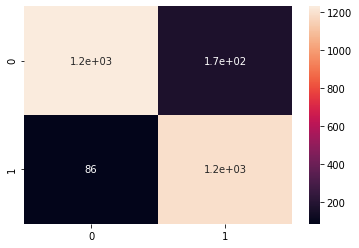

In [33]:
import seaborn as sns
sns.heatmap(lr_cf_matrix, annot=True)

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Micro Precision: {:.2f}'.format(precision_score(lr_y_test, lr_y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(lr_y_test, lr_y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(lr_y_test, lr_y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(lr_y_test, lr_y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(lr_y_test, lr_y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(lr_y_test, lr_y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(lr_y_test, lr_y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(lr_y_test, lr_y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(lr_y_test, lr_y_pred, average='weighted')))

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.90
Macro Recall: 0.90
Macro F1-score: 0.90

Weighted Precision: 0.91
Weighted Recall: 0.90
Weighted F1-score: 0.90


# **NaiveBayes**

In [35]:
class NaiveBayes():
    """The Gaussian Naive Bayes classifier. """
    def fit(self, X, y):
        self.X, self.y = X, y
        self.classes = np.unique(y)
        self.parameters = []
        # Calculate the mean and variance of each feature for each class
        for i, c in enumerate(self.classes):
            # Only select the rows where the label equals the given class
            index =  list(y[y==c].index)
            X_where_c = X.loc[index, :]

            self.parameters.append([])
            # Add the mean and variance for each feature (column)
            for col in X_where_c:
                parameters = {"mean": X_where_c[col].describe()['mean'], "var": math.pow( X_where_c[col].describe()['std'], 2)}
                self.parameters[i].append(parameters)

    def _calculate_likelihood(self, mean, var, feature):
        """ Gaussian likelihood of the data x given mean and var """
        eps = 1e-4 # Added in denominator to prevent division by zero
        coeff = 1.0 / math.sqrt(2.0 * math.pi * var + eps)
        exponent = np.exp(-((feature - mean).pow(2) / (2 * var + eps)))
        return coeff * exponent

    def _calculate_prior(self, c):
        """ Calculate the prior of class c
        (samples where class == c / total number of samples)"""
        frequency = np.mean(self.y == c)
        return frequency

    def _classify(self, X):
        """ Classification using Bayes Rule P(Y|X) = P(X|Y)*P(Y)/P(X),
            or Posterior = Likelihood * Prior / Scaling Factor
        P(Y|X) - The posterior is the probability that sample x is of class y given the
                 feature values of x being distributed according to distribution of y and the prior.
        P(X|Y) - Likelihood of data X given class distribution Y.
                 Gaussian distribution (given by _calculate_likelihood)
        P(Y)   - Prior (given by _calculate_prior)
        P(X)   - Scales the posterior to make it a proper probability distribution.
                 This term is ignored in this implementation since it doesn't affect
                 which class distribution the sample is most likely to belong to.
        Classifies the sample as the class that results in the largest P(Y|X) (posterior)
        """
        posteriors = []
        # Go through list of classes
        for i, c in enumerate(self.classes):
            # Initialize posterior as prior
            posterior = self._calculate_prior(c)
            # Naive assumption (independence):
            # P(x1,x2,x3|Y) = P(x1|Y)*P(x2|Y)*P(x3|Y)
            # Posterior is product of prior and likelihoods (ignoring scaling factor)
            for index, col in enumerate(X.columns):
                # Likelihood of feature value given distribution of feature values given y
                likelihood = self._calculate_likelihood(self.parameters[i][index]["mean"], self.parameters[i][index]["var"], X[col])
                posterior *= likelihood
                posterior_arr = posterior.to_numpy()
            posteriors.append(posterior_arr)
        # Return the class with the largest posterior probability
        return self.classes[np.argmax(posteriors, 0)]

    def predict(self, X):
        """ Predict the class labels of the samples in X """
        y_pred = self._classify(X)
        return y_pred

In [36]:
label_encoding_df = label_encoding_df.drop(['bias'], axis = 1)
nb_X = label_encoding_df.drop('class', axis=1)  
nb_y = label_encoding_df['class']
nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(nb_X, nb_y, test_size=0.33)

In [37]:
    nb_clf = NaiveBayes()
    nb_clf.fit(nb_X_train, nb_y_train)
    nb_y_pred = nb_clf.predict(nb_X_test)

In [38]:
    nb_accuracy = accuracy_score(nb_y_test, nb_y_pred)
    print ("NaiveBayes accuracy:", nb_accuracy)

NaiveBayes accuracy: 0.9037313432835821


In [39]:
nb_cf_matrix = confusion_matrix(nb_y_test, nb_y_pred)
print(nb_cf_matrix)

[[1288  113]
 [ 145 1134]]


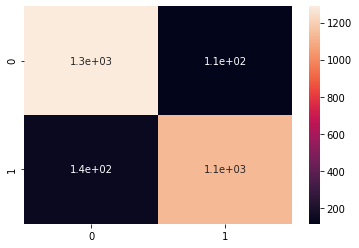

In [40]:
sns.heatmap(nb_cf_matrix, annot=True)

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Micro Precision: {:.2f}'.format(precision_score(nb_y_test, nb_y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(nb_y_test, nb_y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(nb_y_test, nb_y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(nb_y_test, nb_y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(nb_y_test, nb_y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(nb_y_test, nb_y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(nb_y_test, nb_y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(nb_y_test, nb_y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(nb_y_test, nb_y_pred, average='weighted')))

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.90
Macro Recall: 0.90
Macro F1-score: 0.90

Weighted Precision: 0.90
Weighted Recall: 0.90
Weighted F1-score: 0.90
